# Dataset

The CIFAR-10 dataset consists of 60000 colour images (32x32) in 10 classes. Each class contains 6000 images. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class.

In [24]:
import numpy as np            
import matplotlib.pyplot as plt  
import tensorflow as tf              
from sklearn.model_selection import train_test_split
import pandas as pd

In [25]:
# load dataset
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# shape of train and test image
print(f'Number of training and validation examples{X_train.shape}')
print(f'Number of test examples{X_test.shape}')

Number of training and validation examples(50000, 32, 32, 3)
Number of test examples(10000, 32, 32, 3)


In [26]:
labels = np.unique(y_test)
print(labels)

[0 1 2 3 4 5 6 7 8 9]


In [27]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog',   'frog',   'horse',  'ship',   'truck']

# display numeric label and corresponding class name 
print('label value \t\t category')
for class_name, label in zip(class_names, labels):
    print (f'{label} \t\t {class_name}')

label value 		 category
0 		 airplane
1 		 automobile
2 		 bird
3 		 cat
4 		 deer
5 		 dog
6 		 frog
7 		 horse
8 		 ship
9 		 truck


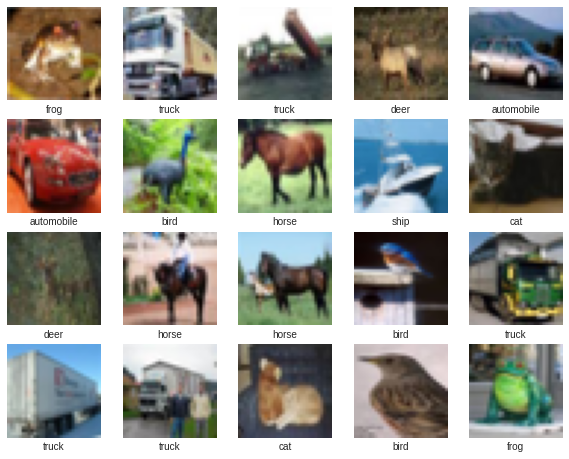

In [28]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in zip(X_train[:20],y_train[:20]):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # remove ticks on x-axis
    plt.yticks([]) # remove ticks on y-axis
    plt.imshow(image, cmap='binary') # set the colormap to 'binary' 
    plt.xlabel(class_names[int(label)])
    i += 1
plt.show()

# Standardizing the data

The data RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general we should seek to make your input values small. Here, we will standardize values to be in the [0, 1].

In [29]:
# scaling the data between 0-1
X_train=X_train/255
X_test=X_test/255

# Splitting the data into training and validation set

In [30]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [31]:
training_set_shape = X_train.shape
print(training_set_shape)

(45000, 32, 32, 3)


# Sequential building of the layers

(A very Simple Model)

In [32]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[32,32,3]),
    tf.keras.layers.Dense(1024,activation="relu"),
    tf.keras.layers.Dense(512,activation="relu"), 
    tf.keras.layers.Dense(10,activation="softmax")
])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________


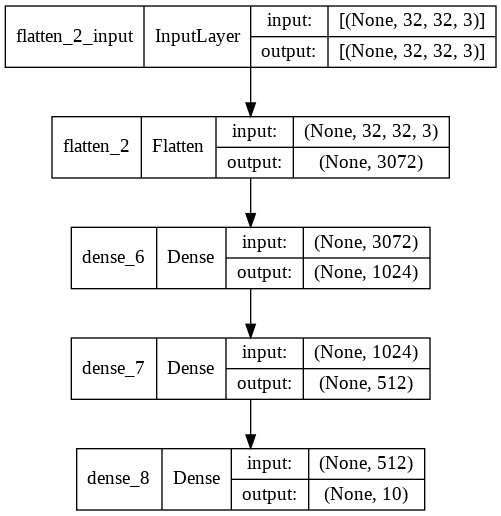

In [34]:
tf.keras.utils.plot_model(model,"cifar-10.png",show_shapes=True,show_layer_names=True)

In [35]:
# compile the model
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",
             metrics=tf.keras.metrics.sparse_categorical_accuracy,
             )

In [36]:
history=model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1407/1407 [==============================] - 41s 29ms/step - loss: 1.8530 - sparse_categorical_accuracy: 0.3353 - val_loss: 1.7400 - val_sparse_categorical_accuracy: 0.3894
Epoch 2/5
1407/1407 [==============================] - 38s 27ms/step - loss: 1.6649 - sparse_categorical_accuracy: 0.4108 - val_loss: 1.7677 - val_sparse_categorical_accuracy: 0.3700
Epoch 3/5
1407/1407 [==============================] - 42s 30ms/step - loss: 1.5824 - sparse_categorical_accuracy: 0.4428 - val_loss: 1.6616 - val_sparse_categorical_accuracy: 0.3988
Epoch 4/5
1407/1407 [==============================] - 38s 27ms/step - loss: 1.5255 - sparse_categorical_accuracy: 0.4624 - val_loss: 1.7744 - val_sparse_categorical_accuracy: 0.3742
Epoch 5/5
1407/1407 [==============================] - 37s 26ms/step - loss: 1.4799 - sparse_categorical_accuracy: 0.4772 - val_loss: 1.6144 - val_sparse_categorical_accuracy: 0.4168


Looking at the output, you can see that our network obtained 51% accuracy. 

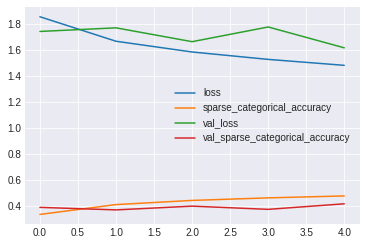

In [37]:
pd.DataFrame((history.history)).plot()

We notice the training accuracy is 70% whereas the validation accuracy is around 51%. Though the accuracy is not so good but still overfitting is less. Training data loss is noted to be reducing epoch after epoch. Validation data loss started dropping more or less after epoch 18. But still we observe some kinks in the plot which can be improved by taking few measures. For example changing neuron count,changing the batch size,adding regularization and dropout,etc may result in better accuracy and smoother curves.

# Evaluate on test set

In [38]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.5895 - sparse_categorical_accuracy: 0.4360


[1.589503526687622, 0.4359999895095825]

# Test on new dataset

In [39]:
model.predict(X_test[1:2])

array([[1.2092514e-02, 4.4245216e-01, 2.0828536e-03, 1.2877799e-03,
        4.1365839e-04, 6.7236973e-04, 1.2055574e-04, 4.1866922e-04,
        2.1862714e-01, 3.2183233e-01]], dtype=float32)

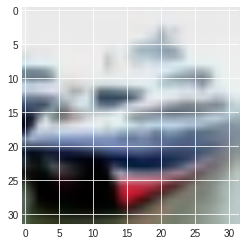

In [40]:
plt.imshow(X_test[1].reshape(32,32,3),interpolation='bilinear')

In [41]:
class_names[np.argmax(model.predict(X_test[1:2]))]

'automobile'

In [42]:
model.predict(X_test[:1])

array([[0.0188531 , 0.08620475, 0.09960142, 0.3637842 , 0.01978583,
        0.18138431, 0.14278339, 0.00131621, 0.08169593, 0.0045909 ]],
      dtype=float32)

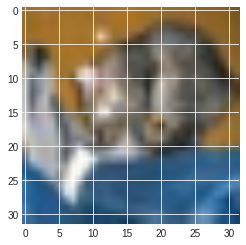

In [43]:
plt.imshow(X_test[0].reshape(32,32,3),interpolation='bilinear')

In [44]:
class_names[np.argmax(model.predict(X_test[:1]))]

'cat'

Here above we have validated two samples randomly and our model has predicted both correctly.

# He Initialization

In [45]:
# add he initialization to the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[32,32,3]),
    tf.keras.layers.Dense(1024,activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(512,activation="relu", kernel_initializer="he_normal"), 
    tf.keras.layers.Dense(10,activation="softmax")
])

# compile the model
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",
             metrics=tf.keras.metrics.sparse_categorical_accuracy,
             )

history=model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1407/1407 [==============================] - 40s 28ms/step - loss: 1.8309 - sparse_categorical_accuracy: 0.3470 - val_loss: 1.7915 - val_sparse_categorical_accuracy: 0.3470
Epoch 2/5
1407/1407 [==============================] - 38s 27ms/step - loss: 1.6480 - sparse_categorical_accuracy: 0.4157 - val_loss: 1.7041 - val_sparse_categorical_accuracy: 0.3944
Epoch 3/5
1407/1407 [==============================] - 38s 27ms/step - loss: 1.5694 - sparse_categorical_accuracy: 0.4460 - val_loss: 1.6417 - val_sparse_categorical_accuracy: 0.4080
Epoch 4/5
1407/1407 [==============================] - 40s 28ms/step - loss: 1.5111 - sparse_categorical_accuracy: 0.4676 - val_loss: 1.5857 - val_sparse_categorical_accuracy: 0.4332
Epoch 5/5
1407/1407 [==============================] - 41s 29ms/step - loss: 1.4631 - sparse_categorical_accuracy: 0.4853 - val_loss: 1.5772 - val_sparse_categorical_accuracy: 0.4378


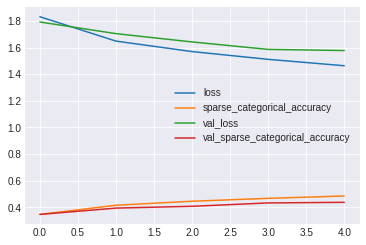

In [46]:
pd.DataFrame((history.history)).plot()

# Apply Different Activation Function

**ReLU vs Leaky ReLU** <br>
<img src="https://i0.wp.com/androidkt.com/wp-content/uploads/2020/05/Selection_019.png?resize=760%2C364">

## Leaky ReLU

To implement this, we have to use this layer instead of Activation Function parameter : 
`tf.keras.layers.LeakyReLU(alpha = 0.1)` where `alpha` is Leak.

In [47]:
# add Leaky ReLU to the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[32,32,3]),
    tf.keras.layers.LeakyReLU(alpha = 0.1),

    tf.keras.layers.Dense(1024, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(alpha = 0.1),

    tf.keras.layers.Dense(512, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(alpha = 0.1),

    tf.keras.layers.Dense(10,activation="softmax")
])


# compile the model
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",
             metrics=tf.keras.metrics.sparse_categorical_accuracy,
             )

history=model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))


Epoch 1/5
1407/1407 [==============================] - 42s 30ms/step - loss: 1.8372 - sparse_categorical_accuracy: 0.3401 - val_loss: 1.8327 - val_sparse_categorical_accuracy: 0.3502
Epoch 2/5
1407/1407 [==============================] - 40s 28ms/step - loss: 1.6538 - sparse_categorical_accuracy: 0.4150 - val_loss: 1.7605 - val_sparse_categorical_accuracy: 0.3618
Epoch 3/5
1407/1407 [==============================] - 37s 26ms/step - loss: 1.5742 - sparse_categorical_accuracy: 0.4458 - val_loss: 1.6963 - val_sparse_categorical_accuracy: 0.3812
Epoch 4/5
1407/1407 [==============================] - 37s 26ms/step - loss: 1.5184 - sparse_categorical_accuracy: 0.4657 - val_loss: 1.6062 - val_sparse_categorical_accuracy: 0.4184
Epoch 5/5
1407/1407 [==============================] - 36s 25ms/step - loss: 1.4721 - sparse_categorical_accuracy: 0.4811 - val_loss: 1.5295 - val_sparse_categorical_accuracy: 0.4518


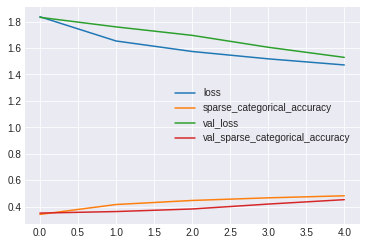

In [48]:
pd.DataFrame((history.history)).plot()

**Leaky ReLU vs PReLU** <br>
<img src="https://imgs.developpaper.com/imgs/2813863991-5e720eab30026_articlex.png">

## PReLU
To implement this, we have to use this layer instead of Activation Function parameter : `tf.keras.layers.PReLU()`

In [49]:
# add PReLU to the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[32,32,3]),
    tf.keras.layers.PReLU(),

    tf.keras.layers.Dense(1024, kernel_initializer="he_normal"),
    tf.keras.layers.PReLU(),

    tf.keras.layers.Dense(512, kernel_initializer="he_normal"),
    tf.keras.layers.PReLU(),

    tf.keras.layers.Dense(10,activation="softmax")
])


# compile the model
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",
             metrics=tf.keras.metrics.sparse_categorical_accuracy,
             )

history=model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))


Epoch 1/5
1407/1407 [==============================] - 58s 41ms/step - loss: 1.8312 - sparse_categorical_accuracy: 0.3466 - val_loss: 1.9807 - val_sparse_categorical_accuracy: 0.2828
Epoch 2/5
1407/1407 [==============================] - 56s 40ms/step - loss: 1.6484 - sparse_categorical_accuracy: 0.4169 - val_loss: 1.7729 - val_sparse_categorical_accuracy: 0.3710
Epoch 3/5
1407/1407 [==============================] - 57s 41ms/step - loss: 1.5689 - sparse_categorical_accuracy: 0.4453 - val_loss: 1.6200 - val_sparse_categorical_accuracy: 0.4220
Epoch 4/5
1407/1407 [==============================] - 57s 41ms/step - loss: 1.5086 - sparse_categorical_accuracy: 0.4672 - val_loss: 1.5658 - val_sparse_categorical_accuracy: 0.4436
Epoch 5/5
1407/1407 [==============================] - 59s 42ms/step - loss: 1.4625 - sparse_categorical_accuracy: 0.4854 - val_loss: 1.7000 - val_sparse_categorical_accuracy: 0.4006


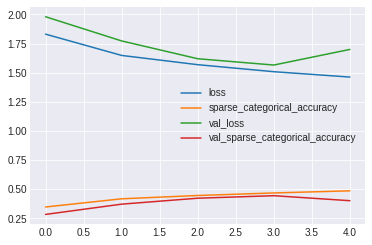

In [50]:
pd.DataFrame((history.history)).plot()

## ELU

<img src="https://360digit.b-cdn.net/assets/admin/ckfinder/userfiles/images/blog/elu.png">

To implement this, we have to use this layer instead of Activation Function parameter : `tf.keras.layers.ELU()`

In [51]:
# add ELU to the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[32,32,3]),
    tf.keras.layers.ELU(),

    tf.keras.layers.Dense(1024, kernel_initializer="he_normal"),
    tf.keras.layers.ELU(),

    tf.keras.layers.Dense(512, kernel_initializer="he_normal"),
    tf.keras.layers.ELU(),

    tf.keras.layers.Dense(10,activation="softmax")
])


# compile the model
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",
             metrics=tf.keras.metrics.sparse_categorical_accuracy,
             )

history=model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))


Epoch 1/5
1407/1407 [==============================] - 40s 28ms/step - loss: 1.8892 - sparse_categorical_accuracy: 0.3280 - val_loss: 2.0594 - val_sparse_categorical_accuracy: 0.2900
Epoch 2/5
1407/1407 [==============================] - 36s 25ms/step - loss: 1.6846 - sparse_categorical_accuracy: 0.4017 - val_loss: 1.7862 - val_sparse_categorical_accuracy: 0.3620
Epoch 3/5
1407/1407 [==============================] - 37s 26ms/step - loss: 1.6066 - sparse_categorical_accuracy: 0.4329 - val_loss: 1.7903 - val_sparse_categorical_accuracy: 0.3570
Epoch 4/5
1407/1407 [==============================] - 38s 27ms/step - loss: 1.5522 - sparse_categorical_accuracy: 0.4544 - val_loss: 1.7252 - val_sparse_categorical_accuracy: 0.3944
Epoch 5/5
1407/1407 [==============================] - 42s 30ms/step - loss: 1.5089 - sparse_categorical_accuracy: 0.4676 - val_loss: 1.6145 - val_sparse_categorical_accuracy: 0.4258


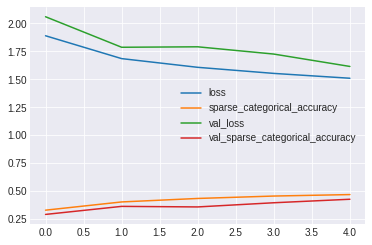

In [52]:
pd.DataFrame((history.history)).plot()

## SeLU

To implement this, we have to use this layer instead of Activation Function parameter : `activation="selu"`

In [53]:
# add SeLU to the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[32,32,3]),
    tf.keras.layers.Dense(1024,activation="selu"),
    tf.keras.layers.Dense(512,activation="selu"), 
    tf.keras.layers.Dense(10,activation="softmax")
])


# compile the model
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",
             metrics=tf.keras.metrics.sparse_categorical_accuracy,
             )

history=model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))


Epoch 1/5
1407/1407 [==============================] - 39s 28ms/step - loss: 2.0453 - sparse_categorical_accuracy: 0.3081 - val_loss: 1.9415 - val_sparse_categorical_accuracy: 0.3258
Epoch 2/5
1407/1407 [==============================] - 36s 25ms/step - loss: 1.7008 - sparse_categorical_accuracy: 0.3986 - val_loss: 1.8638 - val_sparse_categorical_accuracy: 0.3378
Epoch 3/5
1407/1407 [==============================] - 38s 27ms/step - loss: 1.6183 - sparse_categorical_accuracy: 0.4269 - val_loss: 2.6309 - val_sparse_categorical_accuracy: 0.2192
Epoch 4/5
1407/1407 [==============================] - 39s 28ms/step - loss: 1.5608 - sparse_categorical_accuracy: 0.4483 - val_loss: 1.6520 - val_sparse_categorical_accuracy: 0.4166
Epoch 5/5
1407/1407 [==============================] - 38s 27ms/step - loss: 1.5149 - sparse_categorical_accuracy: 0.4649 - val_loss: 1.8810 - val_sparse_categorical_accuracy: 0.3358


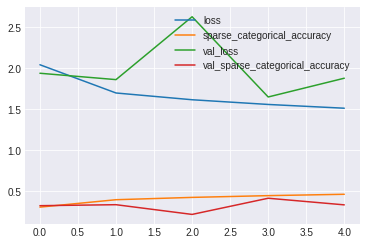

In [54]:
pd.DataFrame((history.history)).plot()

## SeLU with "lecun_normal"

In [55]:
# add SeLU to the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[32,32,3]),
    tf.keras.layers.Dense(1024,activation="selu",kernel_initializer="lecun_normal"),
    tf.keras.layers.Dense(512,activation="selu",kernel_initializer="lecun_normal"), 
    tf.keras.layers.Dense(10,activation="softmax")
])


# compile the model
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",
             metrics=tf.keras.metrics.sparse_categorical_accuracy,
             )

history=model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))


Epoch 1/5
1407/1407 [==============================] - 39s 27ms/step - loss: 2.0087 - sparse_categorical_accuracy: 0.3110 - val_loss: 2.3188 - val_sparse_categorical_accuracy: 0.2376
Epoch 2/5
1407/1407 [==============================] - 44s 31ms/step - loss: 1.7172 - sparse_categorical_accuracy: 0.3915 - val_loss: 2.0499 - val_sparse_categorical_accuracy: 0.2920
Epoch 3/5
1407/1407 [==============================] - 40s 28ms/step - loss: 1.6350 - sparse_categorical_accuracy: 0.4205 - val_loss: 1.7430 - val_sparse_categorical_accuracy: 0.3792
Epoch 4/5
1407/1407 [==============================] - 40s 28ms/step - loss: 1.5790 - sparse_categorical_accuracy: 0.4414 - val_loss: 1.7095 - val_sparse_categorical_accuracy: 0.3796
Epoch 5/5
1407/1407 [==============================] - 37s 26ms/step - loss: 1.5355 - sparse_categorical_accuracy: 0.4590 - val_loss: 1.6242 - val_sparse_categorical_accuracy: 0.4294


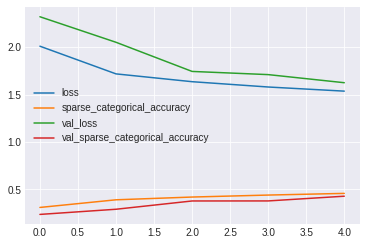

In [56]:
pd.DataFrame((history.history)).plot()

# Batch Normalization

<img src="https://images.deepai.org/glossary-terms/981e1ffea3814ae193c27461253faf63/batch_normalization.png">


To implement this, we have to simply use this `layer tf.keras.layers.batch_normalization()`. We can apply BN Layer before activation function or even after activation function.

In [57]:
# add BN to the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[32,32,3]),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(1024,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(512,activation="relu",kernel_initializer="he_normal"), 
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(10,activation="softmax")
])


# compile the model
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",
             metrics=tf.keras.metrics.sparse_categorical_accuracy,
             )

history=model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1407/1407 [==============================] - 58s 41ms/step - loss: 1.7154 - sparse_categorical_accuracy: 0.4050 - val_loss: 1.5601 - val_sparse_categorical_accuracy: 0.4494
Epoch 2/5
1407/1407 [==============================] - 58s 41ms/step - loss: 1.4205 - sparse_categorical_accuracy: 0.5025 - val_loss: 1.4991 - val_sparse_categorical_accuracy: 0.4730
Epoch 3/5
1407/1407 [==============================] - 57s 41ms/step - loss: 1.3047 - sparse_categorical_accuracy: 0.5442 - val_loss: 1.4598 - val_sparse_categorical_accuracy: 0.4878
Epoch 4/5
1407/1407 [==============================] - 57s 41ms/step - loss: 1.2117 - sparse_categorical_accuracy: 0.5747 - val_loss: 1.4282 - val_sparse_categorical_accuracy: 0.5002
Epoch 5/5
1407/1407 [==============================] - 58s 41ms/step - loss: 1.1389 - sparse_categorical_accuracy: 0.6001 - val_loss: 1.4148 - val_sparse_categorical_accuracy: 0.5122


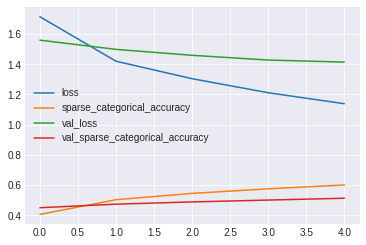

In [58]:
pd.DataFrame((history.history)).plot()